<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/06-Metricas_de_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

# <font color='blue'>Métricas de evaluación</font>

Se recomienda revisar el siguiente enlace: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Diferencia entre función de costo y métrica de evaluación 

Como vimos en las primeras sesiones de clase, a la hora de definir una tarea de ML es necesario establecer la plantilla de modelo que se va a usar, junto con eel criterio de entrenmiento o función de costo y el algoritmo de entrenamiento. La función de costo es una medida que nos permite realizar la optimización del modelo y que debe cumplir ciertas restricciones, como el hecho de ser continua, pero su valor no necesariamente tiene una interpretación directa de cara al problema que se está resolviendo. Por esa razón es necesario utilizar médidas de evaluación, que permitan establecer el desempeño del modelo de ML.

**Ejemplo**: Compare el error de clasificación con la cross-entropía

## Medidas de desempeño para problemas de Clasificación


Error de clasificación:

$$E = \frac{1}{N} \sum_{i=1}^{N} [\![ f({\bf{x}}_i) \neq y_i ]\!]$$

donde $[\![ \cdot ]\!]$ es una función indicador que es igual a 1 cuando la condición se cumple y 0 de lo contrario.

In [ ]:
#Se puede calcular con el siguiente método, ofrece resultados en términos absolutos y en porcentaje.
from sklearn.metrics import zero_one_loss

#### En un problema de clasificación los errores no son todos iguales

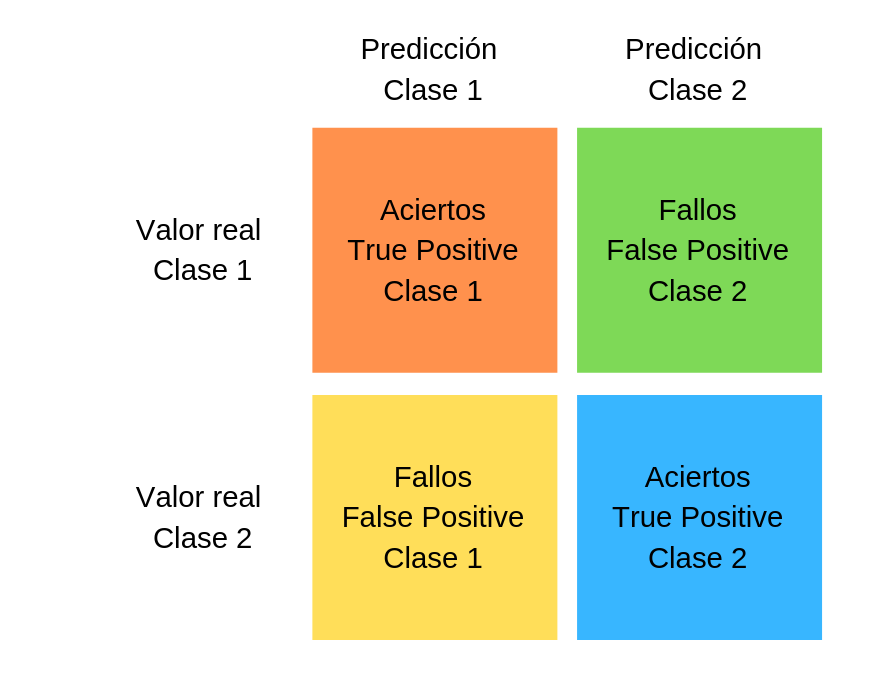

In [7]:
from IPython.display import Image
Image("local/imgs/confusion_matix_example.png", width = 600)

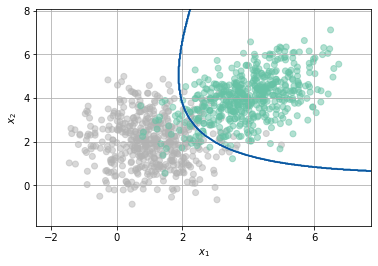

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
N = 500
Cov = np.identity(2) * 1.1
Cov2 = np.array([[1.1,0.5],[0.5,1.1]])
Mean = [1.1,2.1]
Mean2 = [4.1,4.1]
x, y  = np.random.multivariate_normal(Mean, Cov, N).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y.flatten())
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Blues)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()

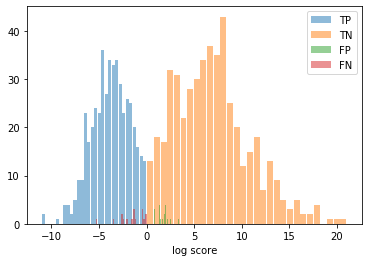

In [8]:
x, y  = np.random.multivariate_normal(Mean, Cov, N).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
Y = Y.flatten()
y_pred = clf.predict(X)
y_pred2 = clf.predict_log_proba(X)
score = y_pred2[:,0]-y_pred2[:,1]
#TruePositive
indi_TP = np.logical_and((y_pred == Y),(Y==1))
#TrueNegative
indi_TN = np.logical_and((y_pred == Y),(Y==0))
#FalsePositive
indi_FP = np.logical_and((y_pred != Y),(Y==1))
#FalseNegative
indi_FN = np.logical_and((y_pred != Y),(Y==0))

TP = score[indi_TP]
TN = score[indi_TN]
FP = score[indi_FP]
FN = score[indi_FN]
_ = plt.hist(TP, bins=30,rwidth=0.9,label='TP',alpha=0.5)
_ = plt.hist(TN, bins=30,rwidth=0.9,label='TN',alpha=0.5)
_ = plt.hist(FP, bins=30,rwidth=0.9,label='FP',alpha=0.5)
_ = plt.hist(FN, bins=30,rwidth=0.9,label='FN',alpha=0.5)
plt.xlabel('log score')
plt.legend()
plt.show()

### Representación gráfica de la matrix de confusión

Confusion matrix, without normalization
[[483  17]
 [ 27 473]]
Normalized confusion matrix
[[0.966 0.034]
 [0.054 0.946]]


/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/julian/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


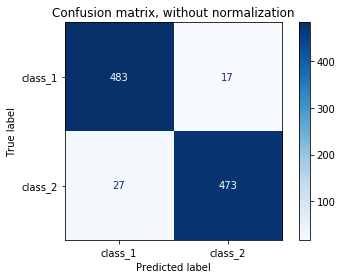

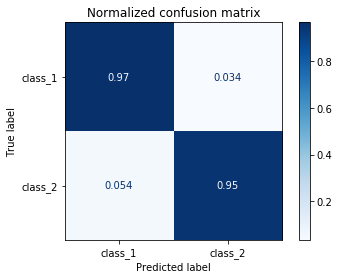

In [9]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X, Y,
                                 display_labels=['class_1','class_2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

En un problema de múltiples clases:

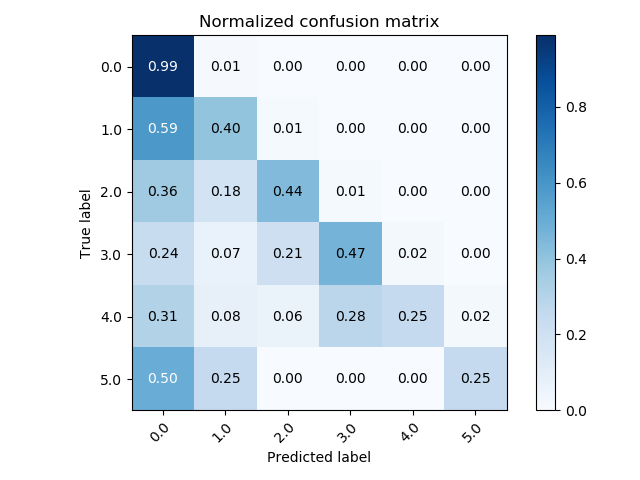

In [8]:
Image("local/imgs/CM.png", width = 600)

### Medidas derivadas de la Matriz de Confusión:


- Sensibilidad (Recall) = True Positive Rate (TPR) = $$\frac{TP}{TP+FN}$$

- Precisión = Positive Predictive Value (PPV)$$\frac{TP}{TP+FP}$$

- Especificidad (sólo en problemas biclase) = $$\frac{TN}{TN+FP}$$

- False Positve Rate (FPR) = $$1 - Especificidad$$

- Exactitud (Accuracy) = $$\frac{TP + TN}{TP+TN+FP+FN}$$

- $$F_\beta = (1+\beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall}$$

Las más usada es para $\beta = 1$ que le da igual importancia a la Precisión y a la Sensibilidad.

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy = '+str(accuracy_score(Y,y_pred)))
print('Precision = '+str(precision_score(Y,y_pred)))
print('Recall = '+str(recall_score(Y,y_pred)))
print('F_1 = '+str(f1_score(Y,y_pred)))

Accuracy = 0.956
Precision = 0.9653061224489796
Recall = 0.946
F_1 = 0.9555555555555556


### <font color='blue'>Problemas desbalanceados</font>

El desbalanceo se presenta cuando para el entrenamiento de un modelo de ML en un problema de clasificación, una de las clases tiene siginificativamente más muestras que las otras.

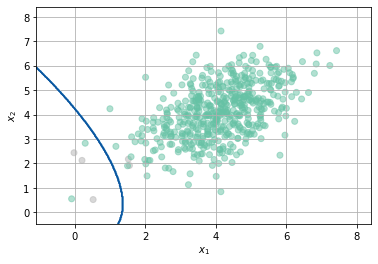

In [12]:
N = 500
Cov = np.identity(2) * 1.1
Cov2 = np.array([[1.1,0.5],[0.5,1.1]])
Mean = [1.1,2.1]
Mean2 = [4.1,4.1]
x, y  = np.random.multivariate_normal(Mean, Cov, int(N/100)).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((int(N/100),1)),np.zeros((N,1))]
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y.flatten())
plt.scatter(X[:,0],X[:,1],c=Y.flatten(), cmap='Set2',alpha=0.5)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Blues)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()

In [18]:
np.sum(Y==0)

500

Validemos sobre un nuevo conjunto de datos:

In [13]:
x, y  = np.random.multivariate_normal(Mean, Cov, int(N/100)).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((int(N/100),1)),np.zeros((N,1))]
Y = Y.flatten()
y_pred = clf.predict(X)

In [14]:
print('Accuracy = '+str(accuracy_score(Y,y_pred)))
print('Precision = '+str(precision_score(Y,y_pred)))

Accuracy = 0.994059405940594
Precision = 1.0


Parece que todo fue fantástico!

Pero....

In [15]:
print('Recall = '+str(recall_score(Y,y_pred)))
print('F_1 = '+str(f1_score(Y,y_pred)))

Recall = 0.4
F_1 = 0.5714285714285715


Para problemas **desbalanceados** se prefiere usar como medida global  de desempeño del sistema alguna de las siguientes:

- Matthews correlation coefficient (MCC) = $$\frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP + FP)(TP+FN)(TN+FP)(TN+FN)}}$$

- Balanced Accuracy (BACC) = $$\frac{TP}{2(TP + FN)} + \frac{TN}{2(TN + FP)}$$
  En general se estima como el promedio del Recall por clase.


- G_mean = $$\sqrt{Sensibilidad \cdot Especificidad}$$

  En general para un problema con q clases, se estima como la raiz q de la productoria del Recall para todas las clases.

In [19]:
from sklearn.metrics import matthews_corrcoef, balanced_accuracy_score
print('MCC = '+str(matthews_corrcoef(Y,y_pred)))
print('BACC = '+str(balanced_accuracy_score(Y,y_pred)))

MCC = 0.6305666611194316
BACC = 0.7


###  <font color='blue'>Para compensar el problema del desbalance también se pueden usar:</font>


- **Técnicas de submuestreo inteligente** : Eliminar datos atípicos y muestras redundantes de la clase mayoritaria

- **Técnicas de sobremuestreo inteligente**: Generar datos artificiales para usar en el entrenamiento que sigan la misma distribución de los datos reales. **Consultar**: [Synthetic Minority Oversampling Technique (SMOTE)](https://www.jair.org/index.php/jair/article/view/10302/24590)

- **Técnicas de muestreo apropiadas durante la validación** (lo veremos en la siguiente clase)

- **Pesos diferentes para el error durante el entrenamiento**: Su implementación depende de cada modelo en particular.


Revisar la librería [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/api.html) la cual contiene varios métodos implementados para sub y sobre muestreo, incluyendo SMOTE.

### ROC Curve

La curva ROC (Receiver Operator Characteristic) se utiliza como una medida de desempeño esperado de un sistema de clasificación. La grafica muestra el desempeño en términos de Sensibilidad vs 1 - Especificidad, para diferentes umbrales de decisión. El área bajo la curva ROC (AUC) se usa como medida de desempeño en varias aplicaciones.


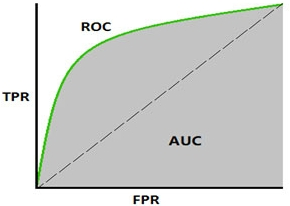

In [75]:
Image("./Images/roc.jpg", width = 300)

#### Grafiquemos la curva ROC del modelo entrenado antes

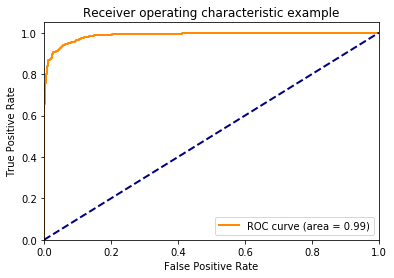

In [20]:
from sklearn.metrics import roc_curve, auc
N = 1000
x, y  = np.random.multivariate_normal(Mean, Cov, N).T
x2, y2  = np.random.multivariate_normal(Mean2, Cov2, N).T
X = np.r_[np.c_[x,y],np.c_[x2,y2]]
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y.flatten())
y_pred2 = clf.predict_log_proba(X)
score = y_pred2[:,0]-y_pred2[:,1]
tpr,fpr,_ = roc_curve(Y, score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Veamos el efecto de la distribución de scores en la Curva ROC 

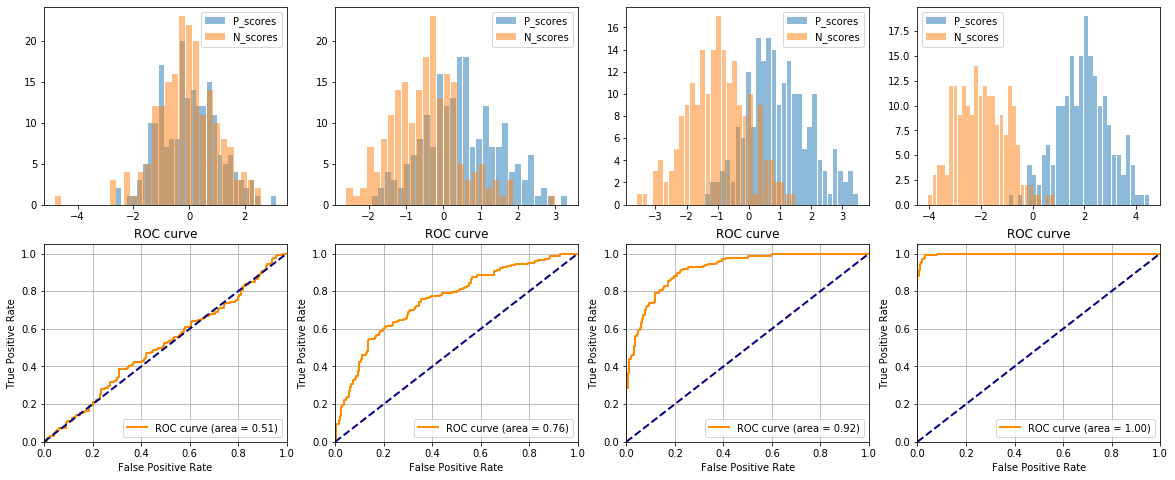

In [110]:
mean = [0,0.5,1,2]
N = 200
Y = np.r_[np.ones((N,1)),np.zeros((N,1))]
plt.figure(figsize=(20,8))
for k,i in enumerate(mean):
    x1 = np.random.randn(N) + i
    x2 = np.random.randn(N) - i
    plt.subplot(2,4,k+1)
    _ = plt.hist(x1, bins=30,rwidth=0.9,alpha=0.5, label= 'P_scores')
    _ = plt.hist(x2, bins=30,rwidth=0.9,alpha=0.5, label = 'N_scores')
    plt.legend()
    plt.subplot(2,4,k+5)
    score = np.r_[x1,x2]
    tpr,fpr,_ = roc_curve(Y, score)
    roc_auc = 1 - auc(fpr, tpr)
    plt.plot(tpr,fpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.grid()
plt.show()

## Medidas de desempeño para problemas de Regresión:

- Mean Square Error (MSE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left(y_i - f({\bf{x}}_i) \right)^2 $$


- Mean Absolute Error (MAE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left|y_i - f({\bf{x}}_i) \right| $$


- Median Absolute Error (MedAE) $$ E = \text{median}\left( |y_1 - f({\bf{x}}_1)|, \cdots, |y_N - f({\bf{x}}_N)| \right) $$



- Mean Absolute Percentage Error (MAPE) $$ E = \frac{1}{N} \sum_{i=1}^{N} \left|\frac{y_i - f({\bf{x}}_i) }{y_i}\right| $$


- Coefficient of determination ($R^2$) $$ R^2 = 1 - \frac{\sum_{i=1}^{N} \left(y_i - f({\bf{x}}_i) \right)^2}{\sum_{i=1}^{N} \left(y_i - \bar{y}) \right)^2}$$
 donde $\bar{y}$ es el promedio de los $y_i$

In [113]:
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

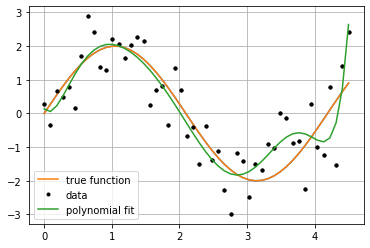

In [3]:
from local.lib.regularization import PolynomialLinearRegression
def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)
    
size = 50
f_x,f_y = f(size)
plt.plot(f_x, f_y)
x, y = sample(50)
plt.plot(x, y, 'k.')
model = PolynomialLinearRegression(degree=8)
model.fit(x,y)
p_y = model.predict(x)
plt.plot(f_x, f_y, label="true function")
plt.plot(x, y, 'k.', label="data")
plt.plot(x, p_y, label="polynomial fit")
plt.legend();
plt.grid();

In [117]:
print('MSE = '+str(mean_squared_error(y,p_y)))
print('MAE = '+str(mean_absolute_error(y,p_y)))
print('MedAE = '+str(median_absolute_error(y,p_y)))
print('MAPE = '+str(mean_absolute_percentage_error(y,p_y)))
print('R^2 = '+str(r2_score(y,p_y)))

MSE = 0.6744931048233564
MAE = 0.6546544519965607
MedAE = 0.5769178793910491
MAPE = 92.8003075177867
R^2 = 0.745604070176843


## Nota:

Aunque usemos varias medidas para evaluar diferentes aspectos del desempeño del modelo de ML,  es **<font color='red'> necesario definir una sola medida de desempeño global </font>** que sea el objetivo de optimización y será la base para seleccionar el mejor model y los mejores hiperparámetros. 

En problemas de **múltiples salidas** a cada salida se le estiman sus correspondientes medidas de error y luego se puede definir una medida global como la suma o el promedio de las medidas de desempeño para cada salida.